<a href="https://colab.research.google.com/github/srujanay18/visualization_assignment/blob/main/FINALA3_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Write your own function to make a kernel density plot.

The user should pass in a Pandas series or Numpy array.
The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.

The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
You can use Matplotlib or Seaborn's .lineplot, but not an existing function that creates kernel density plots.
You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn kdeplot.

We covered the Gaussian, and uniform kernels in class, but the Epanechnikov kernel is


In order to make your code run reasonably quickly, consider using the pdist or cdist functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing for loops will be slow, but that's fine.

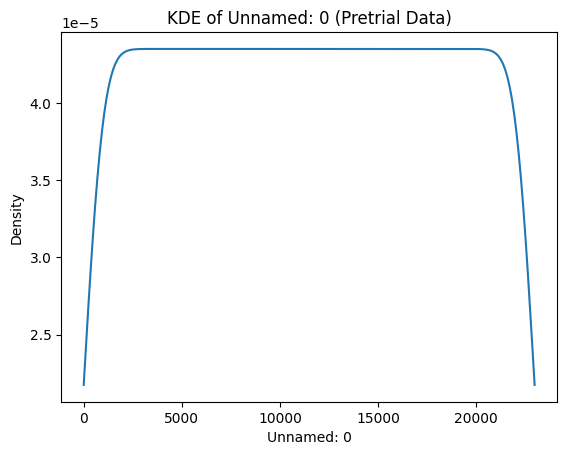

In [1]:
# Q1. write my own kde function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# silverman's plug-in bandwidth
def silverman_bandwidth(x):
    x = np.asarray(x)
    x = x[~np.isnan(x)]
    n = len(x)
    std = np.std(x, ddof=1)
    q75, q25 = np.percentile(x, [75, 25])
    iqr = q75 - q25
    sigma = min(std, iqr/1.34)
    h = 0.9 * sigma * n**(-1/5)
    return h

# gaussian kde
def kde_gaussian(x, grid=None, bandwidth=None):
    x = np.asarray(x)
    x = x[~np.isnan(x)]
    n = len(x)
    if bandwidth is None:
        bandwidth = silverman_bandwidth(x)
    if grid is None:
        grid = np.linspace(x.min()-1, x.max()+1, 200)
    density = []
    for g in grid:
        z = (g - x) / bandwidth
        k = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * z**2)
        density.append(k.mean() / bandwidth)
    return grid, np.array(density)

pretrial = pd.read_csv("/content/pretrial_data.csv")
num_col = pretrial.select_dtypes(include=[np.number]).columns[0]

grid, dens = kde_gaussian(pretrial[num_col].dropna())
plt.plot(grid, dens)
plt.title(f"KDE of {num_col} (Pretrial Data)")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()

## Q2. This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:

level - Level of institution (4-year, 2-year)
aid_value - The average amount of student aid going to undergraduate recipients
control - Public, Private not-for-profit, Private for-profit
grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)
Load the ./data/college_completion.csv data with Pandas.
What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
Cross tabulate control and level. Describe the patterns you see.
For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?
Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
# Q2.1: Load the ./data/college_completion.csv data with Pandas.
df = pd.read_csv("/content/college_completion.csv")

# Q2.2: What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
print("Dimensions:", df.shape)
print("Variables:", df.columns.tolist())
df.head()

Dimensions: (3798, 63)
Variables: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


The dimensions of the data are 3798 rows and 63 columns. There are 3798 observations. The variables included are listed above.

In [3]:
# Q2.3: Cross tabulate control and level. Describe the patterns you see.
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


The patterns shown are that 2-year colleges have the most public control, then private for-profit, then private not-for profit. However, for 4-year colleges, private not-for-profit has the most control, then public, then private for-profit.

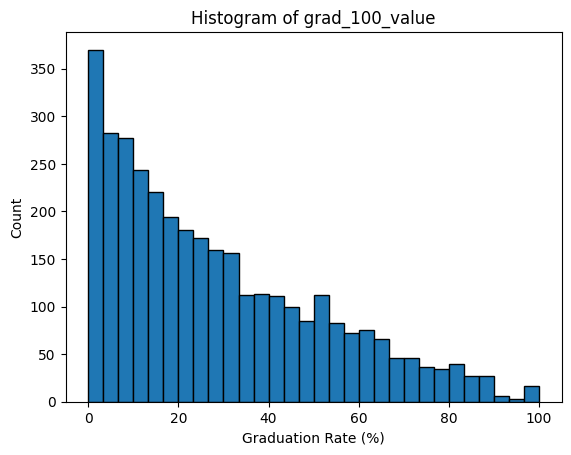

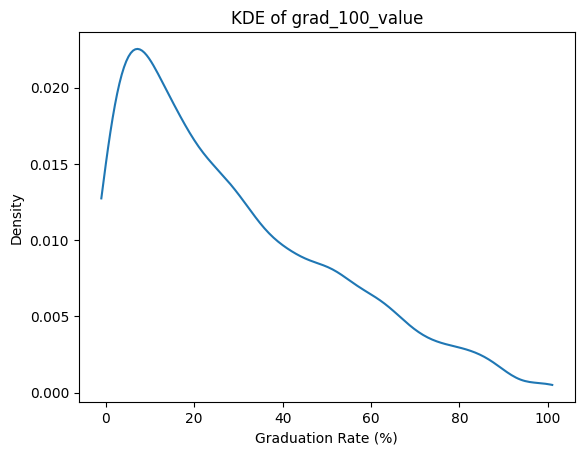

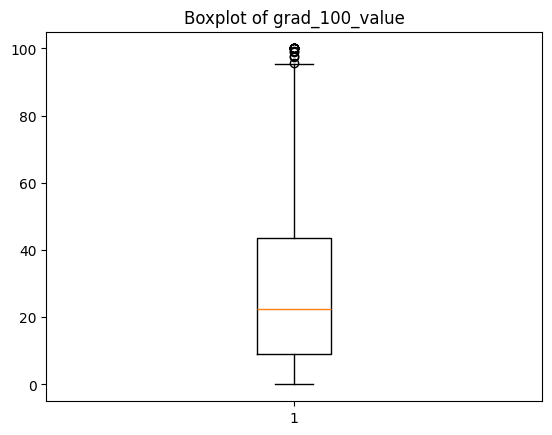

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [4]:
# Q2.4: For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
grad = df['grad_100_value']

plt.hist(grad.dropna(), bins=30, edgecolor='black')
plt.title("Histogram of grad_100_value")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Count")
plt.show()

grid, dens = kde_gaussian(grad.dropna())
plt.plot(grid, dens)
plt.title("KDE of grad_100_value")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

plt.boxplot(grad.dropna())
plt.title("Boxplot of grad_100_value")
plt.show()

grad.describe()

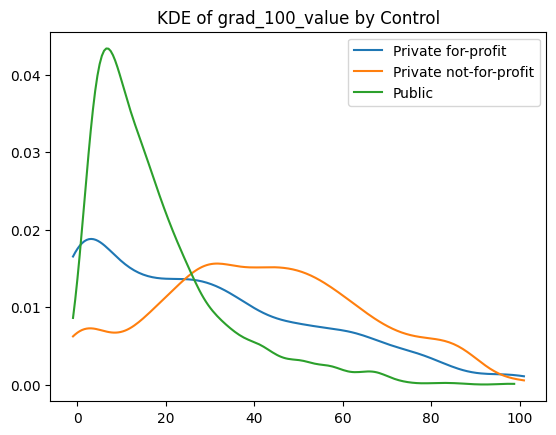

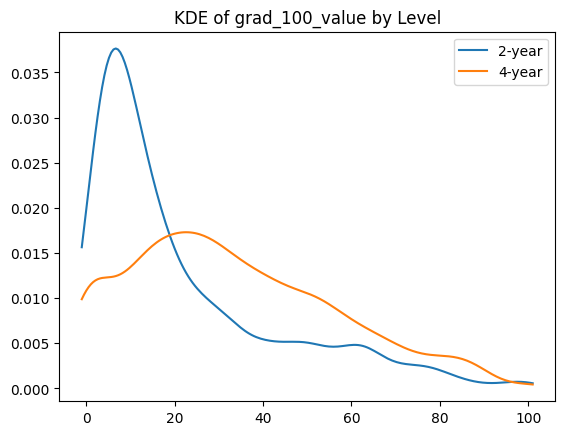

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [5]:
# Q2.5: For grad_100_value, create a grouped kernel density plot by control and by level.
# Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates?
for g, sub in df.groupby("control"):
    grid, dens = kde_gaussian(sub['grad_100_value'].dropna())
    plt.plot(grid, dens, label=g)
plt.legend()
plt.title("KDE of grad_100_value by Control")
plt.show()

for g, sub in df.groupby("level"):
    grid, dens = kde_gaussian(sub['grad_100_value'].dropna())
    plt.plot(grid, dens, label=g)
plt.legend()
plt.title("KDE of grad_100_value by Level")
plt.show()

print(df.groupby("control")['grad_100_value'].describe())
print(df.groupby("level")['grad_100_value'].describe())

The grouped KDE plots and summary statistics show differences in graduation rates across institution types. Private not-for-profit schools have the best outcomes, with a mean graduation rate of about 41.7% and median of 41%, and their density is shifted farthest right. Private for-profit institutions are in the middle, with an average around 29.1%, while Public schools are last with a mean of only 17.4%. By level, 4-year institutions perform much better (mean 33.2%, median 29.7%) compared to 2-year schools (mean 21.6%, median 13.0%). Overall the strongest graduation rates are found at 4-year, Private not-for-profit institutions, while Public 2-year colleges show the weakest rates.


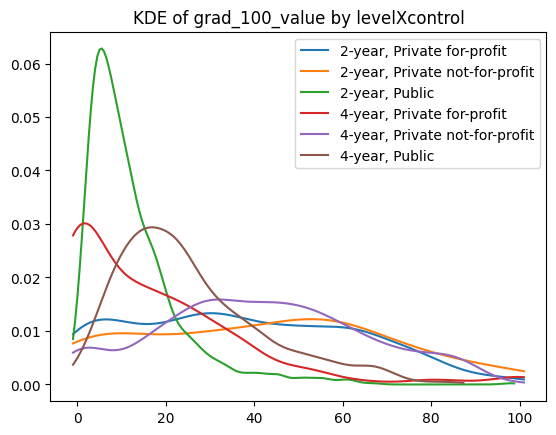

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year, Private for-profit",461.0,37.197614,25.497380,0.0,15.800,33.9,57.800,100.0
"2-year, Private not-for-profit",68.0,41.913235,28.348302,0.0,16.225,44.4,61.200,100.0
"2-year, Public",926.0,12.400000,10.893600,0.0,5.100,9.4,16.175,97.8
"4-year, Private for-profit",318.0,17.382704,20.788525,0.0,0.000,12.5,26.325,100.0
"4-year, Private not-for-profit",1121.0,41.645674,23.243453,0.0,25.000,41.0,57.800,100.0
"4-year, Public",573.0,25.561082,16.403902,0.0,13.600,21.8,33.800,86.3


In [6]:
# Q2.6: Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control.
# Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
df['levelXcontrol'] = df['level'] + ", " + df['control']

for g, sub in df.groupby("levelXcontrol"):
    grid, dens = kde_gaussian(sub['grad_100_value'].dropna())
    plt.plot(grid, dens, label=g)
plt.legend()
plt.title("KDE of grad_100_value by levelXcontrol")
plt.show()

df.groupby("levelXcontrol")['grad_100_value'].describe()

After creating the variable and plotting the grouped KDE, the right-shifted curves show that Private not-for-profit institutions have the best graduation rates at both levels, especially for 4-year, Private not-for-profit (mean 41.65%, median 41.0%, IQR 25.0–57.8). For 2-year schools, Private not-for-profit also is best (mean 41.91%, median 44.4%). 2-year, Private for-profit is next (mean 37.20%), then 4-year, Public (mean 25.56%). The weakest outcomes are 2-year, Public (mean 12.40%, median 9.4%).

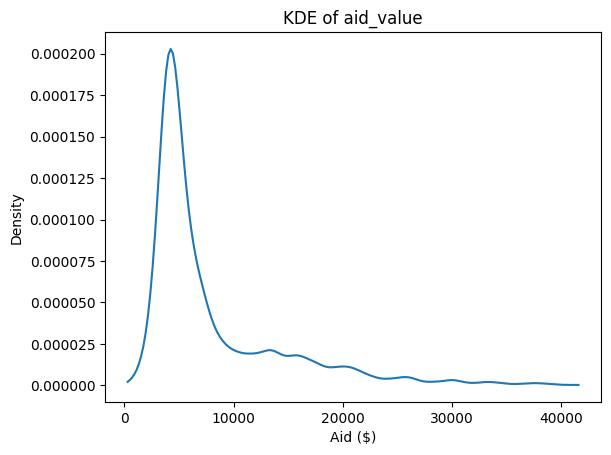

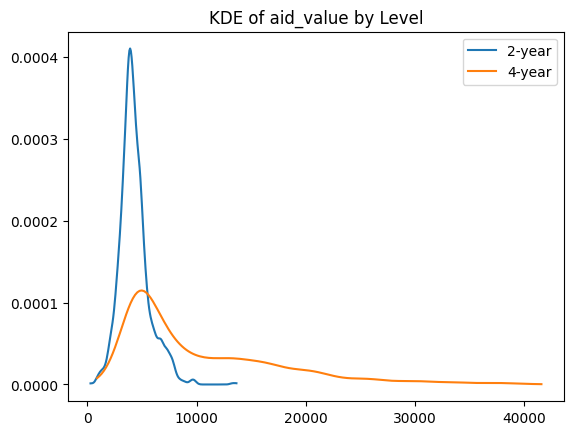

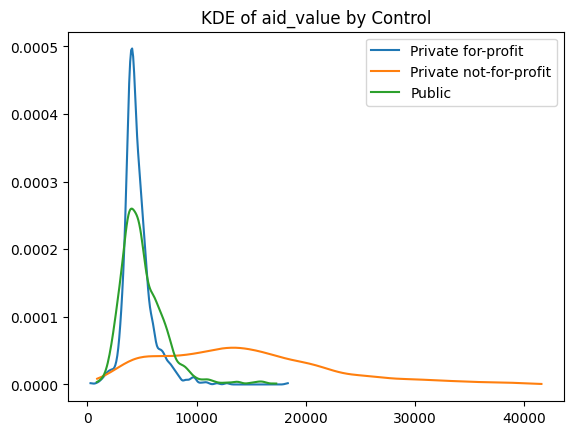

         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   

In [7]:
# Q2.7: Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph?
# Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
aid = df['aid_value']

grid, dens = kde_gaussian(aid.dropna())
plt.plot(grid, dens)
plt.title("KDE of aid_value")
plt.xlabel("Aid ($)")
plt.ylabel("Density")
plt.show()

for g, sub in df.groupby("level"):
    grid, dens = kde_gaussian(sub['aid_value'].dropna())
    plt.plot(grid, dens, label=g)
plt.legend()
plt.title("KDE of aid_value by Level")
plt.show()

for g, sub in df.groupby("control"):
    grid, dens = kde_gaussian(sub['aid_value'].dropna())
    plt.plot(grid, dens, label=g)
plt.legend()
plt.title("KDE of aid_value by Control")
plt.show()

print(df.groupby("level")['aid_value'].describe())
print(df.groupby("control")['aid_value'].describe())

The overall KDE of aid_value is right-skewed with a low mode around $4–5k and a long tail past $40k. The shape is a mixture of groups with different aid levels. By level, 2-year schools cluster low (mean $4,311, median $4,113, IQR $3,486–$4,890, max $13,654), while 4-year schools are much higher and more dispersed (mean $10,235, median $7,222, IQR $4,831–$14,046, max $41,580). By control, Private not-for-profit drives the right tail (mean $14,181, median $13,322, IQR $8,325–$18,571, max $41,580). Public is in the middle (mean $5,095, median $4,667, IQR $3,725–$6,088, max $17,299). Private for-profit is lowest and tight (mean $4,632, median $4,331, IQR $3,862–$5,132, max $18,355). These differences explain the overall density’s low central peak with a long, high-aid shoulder.

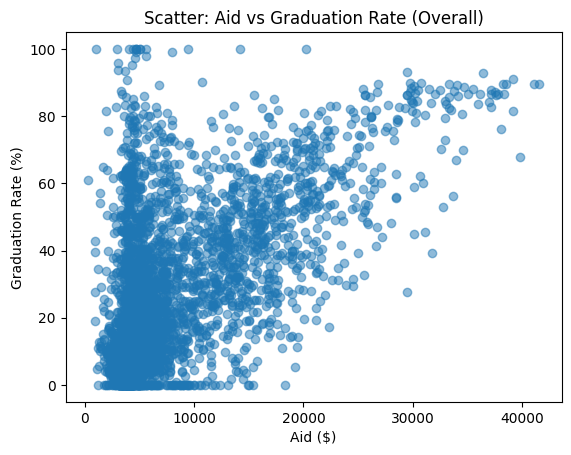

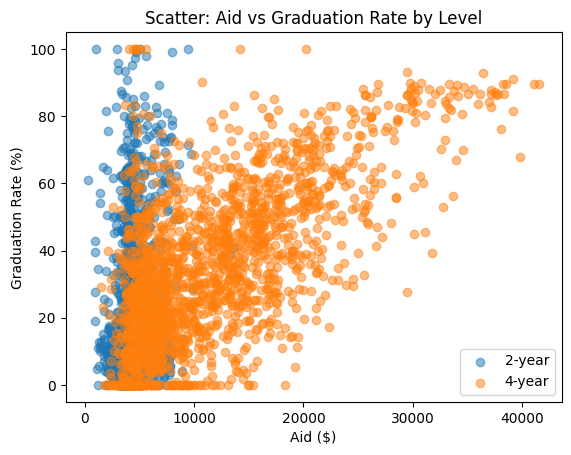

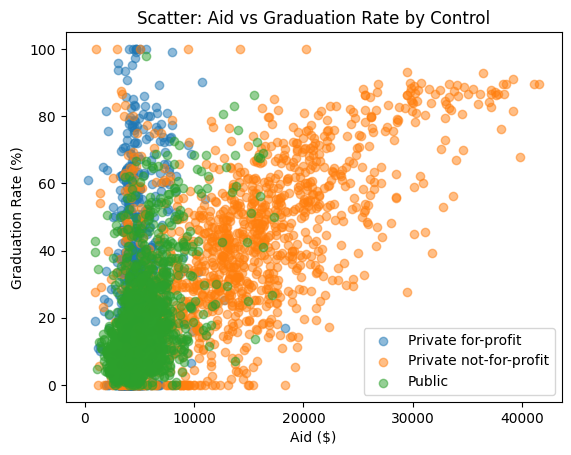

In [8]:
# Q2.8: Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control.
# Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
plt.scatter(df['aid_value'], df['grad_100_value'], alpha=0.5)
plt.title("Scatter: Aid vs Graduation Rate (Overall)")
plt.xlabel("Aid ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

for g, sub in df.groupby("level"):
    plt.scatter(sub['aid_value'], sub['grad_100_value'], alpha=0.5, label=g)
plt.legend()
plt.title("Scatter: Aid vs Graduation Rate by Level")
plt.xlabel("Aid ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

for g, sub in df.groupby("control"):
    plt.scatter(sub['aid_value'], sub['grad_100_value'], alpha=0.5, label=g)
plt.legend()
plt.title("Scatter: Aid vs Graduation Rate by Control")
plt.xlabel("Aid ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

The overall scatterplot shows a clear positive relationship, with higher aid_value aligning with higher grad_100_value, but with wide spread at low aid. Grouping by level makes the pattern sharper, where 4-year schools show a strong upward trend, while 2-year schools cluster at low aid with only a weak rise in graduation rates. Grouping by control shows the steepest slope for Private not-for-profit institutions, a decent/moderate rise for Public, and only a weak association for Private for-profit. Aid seems to boost graduation rates most for 4-year, Private not-for-profit schools, somewhat for Public, and least for 2-year and Private for-profit institutions.